In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
print(train.info())
print(train.describe())
print(train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
       Item_Weight  Item_Visibility     

In [4]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

test['Item_Weight'].fillna(test['Item_Weight'].mean(), inplace=True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0], inplace=True)

C:\Users\karan\AppData\Local\Temp\ipykernel_20152\3550487444.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)
C:\Users\karan\AppData\Local\Temp\ipykernel_20152\3550487444.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [5]:
train['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}, inplace=True)
test['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}, inplace=True)

C:\Users\karan\AppData\Local\Temp\ipykernel_20152\1231178260.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}, inplace=True)
C:\Users\karan\AppData\Local\Temp\ipykernel_20152\1231178260.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

In [6]:
train['Outlet_Age'] = 2025 - train['Outlet_Establishment_Year']
test['Outlet_Age'] = 2025 - test['Outlet_Establishment_Year']

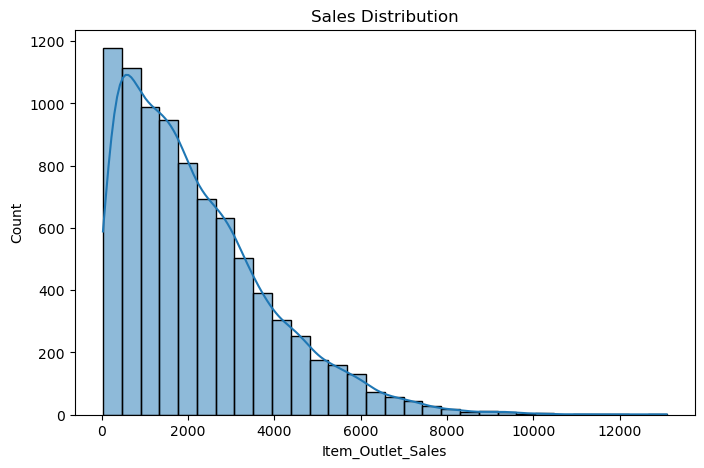

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(train['Item_Outlet_Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.show()

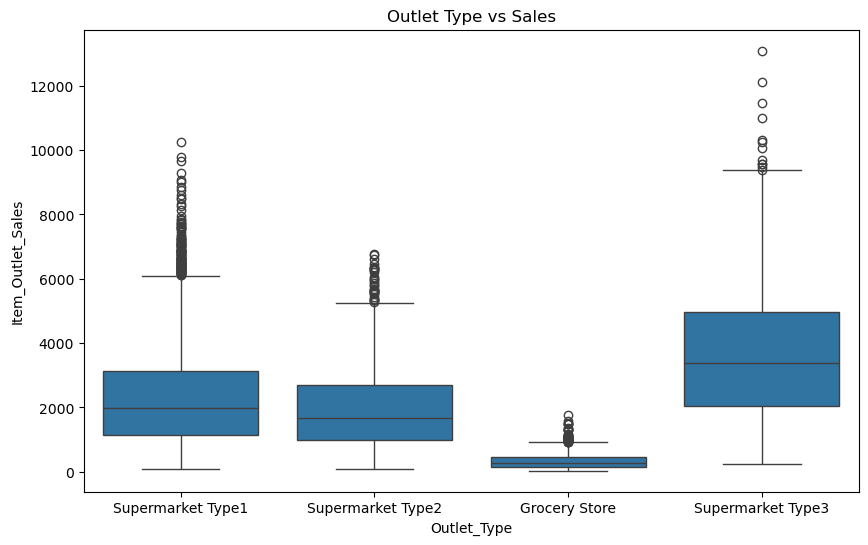

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train)
plt.title('Outlet Type vs Sales')
plt.show()

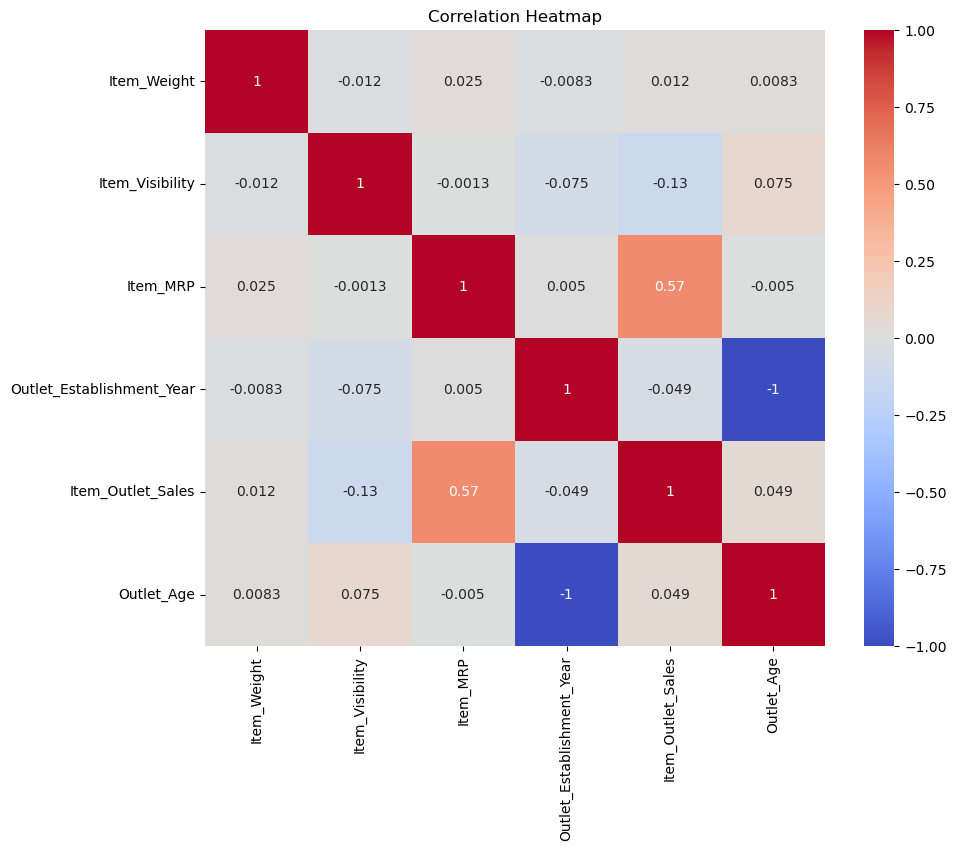

In [9]:
corr = train.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
cat_cols = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
le = LabelEncoder()
for col in cat_cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

In [11]:
X = train.drop(['Item_Identifier','Item_Outlet_Sales','Outlet_Establishment_Year'], axis=1)
y = train['Item_Outlet_Sales']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_val)
r2 = r2_score(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)

R² Score: 0.5247484654515324
RMSE: 1136.5383605564741


Item_MRP                972.172673
Outlet_Type             687.409313
Outlet_Identifier       183.960781
Item_Fat_Content         32.346657
Outlet_Age                6.218690
Item_Type                 0.846652
Item_Weight             -10.609450
Item_Visibility         -80.913982
Outlet_Location_Type   -169.677234
Outlet_Size            -215.922003
dtype: float64


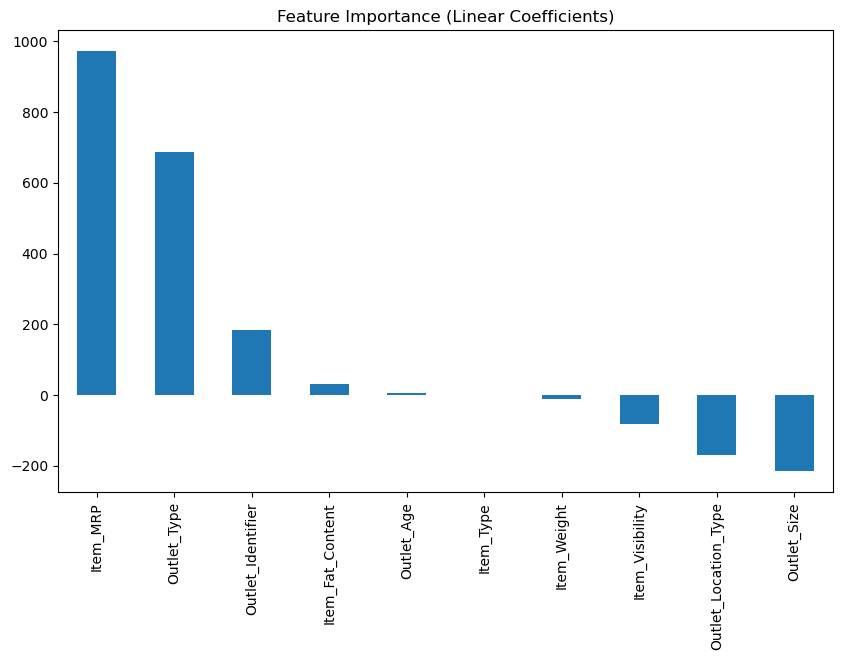

In [13]:
features = X.columns
importance = pd.Series(model.coef_, index=features).sort_values(ascending=False)
print(importance)

plt.figure(figsize=(10,6))
importance.plot(kind='bar', title='Feature Importance (Linear Coefficients)')
plt.show()

In [14]:
test_scaled = scaler.transform(test.drop(['Item_Identifier','Outlet_Establishment_Year'], axis=1))
test_predictions = model.predict(test_scaled)
test['Predicted_Sales'] = test_predictions